Fase 6 – Visualización de Datos
Usar matplotlib y pandas para mostrar:
1.	Gráfico de barras: número de pacientes atendidos por servicio.
2.	Gráfico circular: distribución por sexo.
3.	Histograma: distribución de edades.
4.	Reporte tabular: promedio de montos por distrito.


✅ Datos cargados correctamente.
  id_paciente         nombre  edad sexo   distrito       servicio  \
0       P0001     Luis Pérez     1    M  Magdalena  Traumatología   
1       P0002  Carmen Flores     0    F  Cajamarca  Traumatología   
2       P0003  Carmen Flores     0    F  Cajamarca        General   
3       P0004  Carmen Flores    19  NaN   Encañada    Odontología   
4       P0005    Diego Ramos     0    F   Encañada  Traumatología   

  fecha_atencion   monto  
0     2024-07-03    0.00  
1     2023-03-10  474.45  
2     2023-09-19    0.00  
3     2023-04-09    0.00  
4     2023-02-04  759.25  


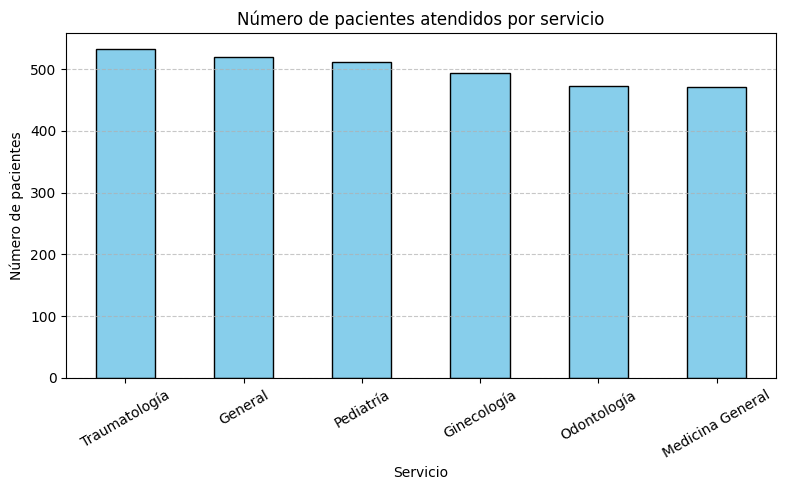

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 1️⃣ Cargar datos limpios
data_path = Path.cwd() / "../database/pacientes_clean.csv"
df = pd.read_csv(data_path)
print("✅ Datos cargados correctamente.")
print(df.head())

# 2️⃣ Asegurar tipos de datos
df["edad"] = pd.to_numeric(df["edad"], errors="coerce").fillna(0).astype(int)
df["monto"] = pd.to_numeric(df["monto"], errors="coerce").fillna(0.0).astype(float)

# 1. Gráfico de barras: pacientes por servicio

plt.figure(figsize=(8,5))
servicio_counts = df["servicio"].value_counts()
servicio_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Número de pacientes atendidos por servicio")
plt.xlabel("Servicio")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

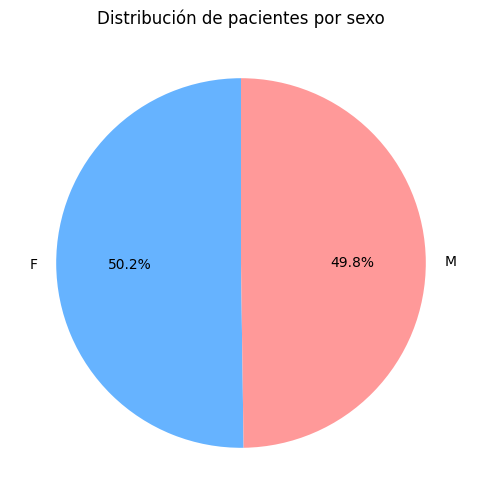

In [3]:

#  2. Gráfico circular: distribución por sexo

plt.figure(figsize=(6,6))
sexo_counts = df["sexo"].value_counts()
plt.pie(sexo_counts, labels=sexo_counts.index, autopct="%1.1f%%", startangle=90, colors=["#66b3ff","#ff9999","#99ff99"])
plt.title("Distribución de pacientes por sexo")
plt.show()

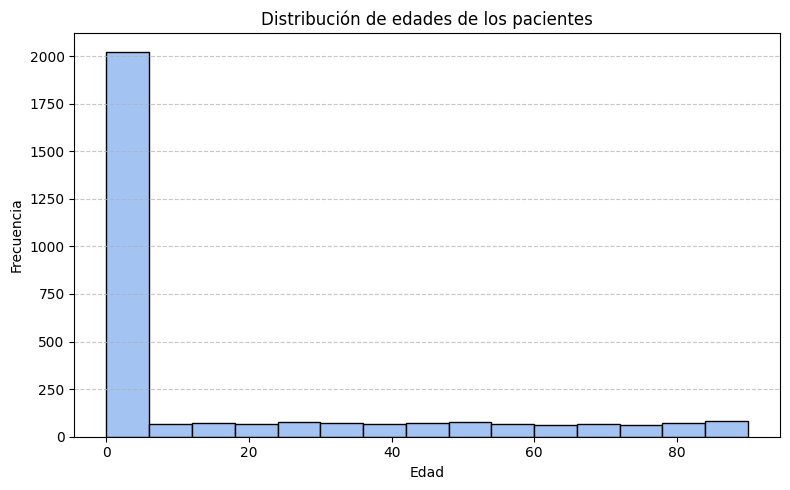

In [4]:

# 3. Histograma: distribución de edades

plt.figure(figsize=(8,5))
df["edad"].plot(kind="hist", bins=15, color="#a3c4f3", edgecolor="black")
plt.title("Distribución de edades de los pacientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [5]:

# 4. Reporte tabular: promedio de montos por distrito

reporte = df.groupby("distrito")["monto"].mean().round(2).reset_index().sort_values(by="monto", ascending=False)
print("\n📊 Promedio de montos por distrito:")
print(reporte)


📊 Promedio de montos por distrito:
         distrito   monto
6       Los Baños  148.34
7       Magdalena  148.02
3     Desconocido  141.79
5           Jesús  137.72
1       Cajamarca  131.37
2        Chetilla  131.31
8          Matara  130.48
0  Baños del Inca  125.44
4        Encañada  120.10


In [6]:

# Conclusiones automáticas (básicas)

print("\n Conclusiones:")
top_servicio = servicio_counts.idxmax()
top_distrito = reporte.iloc[0]["distrito"]
print(f"• El servicio con más atenciones es: {top_servicio}.")
print(f"• El distrito con el monto promedio más alto es: {top_distrito}.")
print("• La mayoría de los pacientes son del sexo más frecuente mostrado en el gráfico circular.")



 Conclusiones:
• El servicio con más atenciones es: Traumatología.
• El distrito con el monto promedio más alto es: Los Baños.
• La mayoría de los pacientes son del sexo más frecuente mostrado en el gráfico circular.
